# Mini Project : California Housing

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

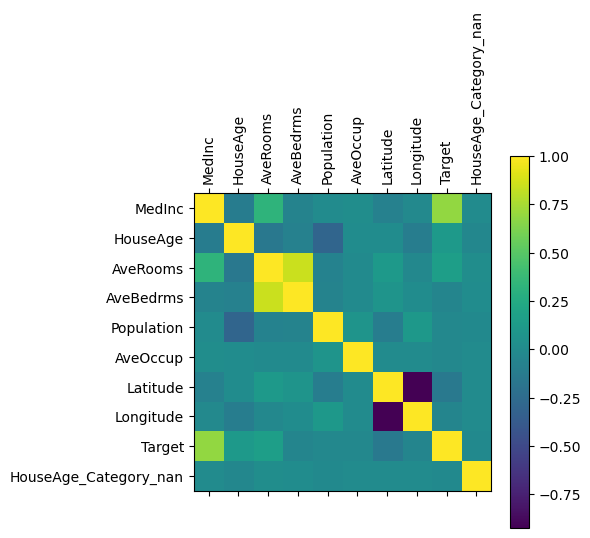


Feature Engineering:

DataFrame after all operations:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.539668  0.784314  0.043512   0.020469    0.008941  0.001499  0.567481   
1  0.538027  0.392157  0.038224   0.018929    0.067210  0.001141  0.565356   
2  0.466028  1.000000  0.052756   0.021940    0.013818  0.001698  0.564293   
3  0.354699  1.000000  0.035241   0.021929    0.015555  0.001493  0.564293   
4  0.230776  1.000000  0.038534   0.022166    0.015752  0.001198  0.564293   

   Longitude  Target  HouseAge_Category_nan  New_Feature  
0   0.211155   4.526                    0.0     0.583181  
1   0.212151   3.585                    0.0     0.576251  
2   0.210159   3.521                    0.0     0.518785  
3   0.209163   3.413                    0.0     0.389940  
4   0.209163   3.422                    0.0     0.269310  


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']

# Explore the Data
print("Statistical Summary:")
print(df.describe())

print("\nPreview of the Data:")
print(df.head())

print("\nMetadata:")
print(df.info())

# Preprocess the Data
print("\nCheck for Missing Data:")
missing_data = df.isnull().sum()
print(missing_data)

print("\nNormalize Continuous Variables:")
scaler = MinMaxScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Categorical Variables
print("\nSimulate a Categorical Variable:")
df['HouseAge_Category'] = pd.cut(df['HouseAge'], bins=[0, 10, 20, np.inf], labels=['New', 'Old', 'Very Old'])

print("\nOne-Hot Encoding:")
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_columns = pd.DataFrame(encoder.fit_transform(df[['HouseAge_Category']]), columns=encoder.get_feature_names_out(['HouseAge_Category']))
df = pd.concat([df, encoded_columns], axis=1)
df = df.drop('HouseAge_Category', axis=1)

# Correlations
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Feature Engineering
print("\nFeature Engineering:")
df['New_Feature'] = df['MedInc'] + df['AveRooms']

# Display the DataFrame after all operations
print("\nDataFrame after all operations:")
print(df.head())


In [19]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Simulate a categorical variable for 'HouseAge'
df['HouseAge_Category'] = pd.cut(df['HouseAge'], bins=[0, 10, 30, float('inf')], labels=['New', 'Old', 'Very Old'])
df = pd.get_dummies(df, columns=['HouseAge_Category'], prefix='HouseAge_Category', drop_first=True)

# Now the columns should be present
new_houses = df[df['HouseAge_Category_New'] == 1]
old_houses = df[df['HouseAge_Category_Old'] == 1]
very_old_houses = df[df['HouseAge_Category_Very Old'] == 1]

# Boolean Indexing for Age Groups
df['Age_Group'] = pd.cut(df['HouseAge'], bins=[0, 10, 30, np.inf], labels=['New', 'Old', 'Very Old'])

# Plotting Histograms
plt.figure(figsize=(12, 6))

# Histogram for New Houses
plt.subplot(1, 3, 1)
plt.hist(df[df['Age_Group'] == 'New']['Target'], bins=20, color='blue', alpha=0.7)
plt.title('New Houses')

# Histogram for Old Houses
plt.subplot(1, 3, 2)
plt.hist(df[df['Age_Group'] == 'Old']['Target'], bins=20, color='green', alpha=0.7)
plt.title('Old Houses')

# Histogram for Very Old Houses
plt.subplot(1, 3, 3)
plt.hist(df[df['Age_Group'] == 'Very Old']['Target'], bins=20, color='red', alpha=0.7)
plt.title('Very Old Houses')

plt.suptitle('Property Age vs. Price')
plt.show()


KeyError: 'HouseAge_Category_New'

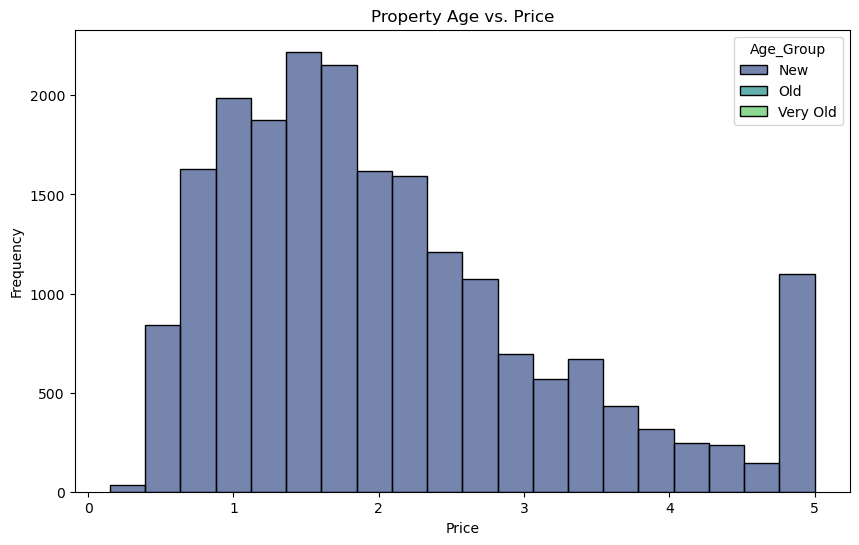

In [20]:
import seaborn as sns

# Boolean Indexing for Age Groups
df['Age_Group'] = pd.cut(df['HouseAge'], bins=[0, 10, 30, np.inf], labels=['New', 'Old', 'Very Old'])

# Plotting Histograms
plt.figure(figsize=(10, 6))

# Histogram for Different Age Groups
sns.histplot(data=df, x='Target', hue='Age_Group', bins=20, multiple='stack', palette='viridis', alpha=0.7)

plt.title('Property Age vs. Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [18]:
new_houses = df[df['HouseAge_Category_New'] == 1]
old_houses = df[df['HouseAge_Category_Old'] == 1]
very_old_houses = df[df['HouseAge_Category_Very Old'] == 1]

# Plotting Histograms
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.hist(new_houses['Target'], bins=20, color='blue', alpha=0.7)
plt.title('New Houses')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.hist(old_houses['Target'], bins=20, color='green', alpha=0.7)
plt.title('Old Houses')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.hist(very_old_houses['Target'], bins=20, color='orange', alpha=0.7)
plt.title('Very Old Houses')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

KeyError: 'HouseAge_Category_New'